In [3]:
from helper import *
from math import log,pi

inpu_data1 = read_input('NLS_Group05/Class1.txt')
inpu_data2 = read_input('NLS_Group05/Class2.txt')

train_data1,test_data1 = part_data(inpu_data1)
train_data2,test_data2 = part_data(inpu_data2)

mean1,variance1 = get_stats(train_data1)
mean2,variance2 = get_stats(train_data2)

total_test_data = test_data1+test_data2

cov1 = cov_matrix(train_data1,mean1)
cov2 = cov_matrix(train_data2,mean2)


# For part a
def cov_task1():
    cov= matrix_add([variance1],[variance2])
    X=cov
    
    cov=matrix_add([[cov[0][0]]],[[cov[0][1]]])
    cov=cov_div(cov,6.0)
    cov=[[cov[0][0] if(i==j) else 0 for j in range(0,len(X[0]))] for i in range(0,len(X[0]))]
    return cov

# for part b
def cov_task2():
    cov1 = cov_matrix(train_data1,mean1)
    cov2 = cov_matrix(train_data2,mean2)

    cov= matrix_add(cov1,cov2)
    
    cov=cov_div(cov,3.0)
    return cov

# For part c
def cov_task3():
    cov1 = cov_diagonal(cov_matrix(train_data1,mean1))
    cov2 = cov_diagonal(cov_matrix(train_data2,mean2))

    return cov1,cov2


# print mean1, variance1
# print mean2, variance2
# print mean3, variance3

# print cov1
# print cov2
# print cov3

# print cov_task1()
# print cov_task2()
# print cov_task3()

In [4]:
# General function for calculating g(x)
def g_x(test_data, mean, cov):
    ans=[]
    cov_inv = inverse_matrix(cov)

#   t2 = -log(2*pi)
    t3 = log(get_determinant(cov))/2.0
    t4 = log(len(test_data)/(float)(len(total_test_data)))
    
    for i in range(0,len(test_data)):
        a = get_difference_vector(test_data[i],mean)
        b = transpose(a)
        result = matrix_multiply(a,cov_inv)
        result = matrix_multiply(result,b)
        result = result[0][0]
        t1 = -1.0*result/2.0
        ans.append(t1+t3+t4)
    return ans

# Function for plotting part(a,b,c,d)

In [5]:
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def task1234(cov_a,cov_b):
    test_data_name = total_test_data
    res1=g_x(test_data_name, mean1, cov_a)
    res2=g_x(test_data_name, mean2, cov_b)

    def dbb():
        ans=[]
        for i in range(0,len(res1)):
    #         print res1[i],res2[i],res3[i]
            val=1
            temp=res1[i]
            if(res2[i]>temp):
                val=2
            ans.append(val)
        return ans
    ans=dbb()
    # Confusion matrix
    def conf_mat():
        m=[]
        count1=0
        count2=0
        for i in range(0, len(test_data1)):
            if(ans[i]==1):
                count1 = count1+1;
        for i in range(len(test_data1), len(total_test_data)):
            if(ans[i]==2):
                count2 = count2+1;
        mm=[count1,len(test_data1)-count1]
        m.append(mm)
        mm=[len(test_data2)-count2, count2]
        m.append(mm)
        return m

    m=conf_mat()
    accuracy=(sum([m[i][i] for i in range(0,2)]))/(float)(sum([sum(m[i]) for i in range(0,2)]))
    precision=[m[i][i]/(float)(m[0][i]+m[1][i]) for i in range(0,2)]
    recall=[m[i][i]/(float)(m[i][0]+m[i][1]) for i in range(0,2)]
    f_measure=[(2*precision[i]*recall[i])/(precision[i]+recall[i]) for i in range(0,2)]
    
    mean_precision=sum([precision[i] for i in range(0,2)])/2.0
    mean_recall=sum([recall[i] for i in range(0,2)])/2.0
    mean_f_measure=sum([f_measure[i] for i in range(0,2)])/2.0
    
    print "Confusion Matrix : {0}".format(m)
    print "Accuracy :",accuracy
    print "Precision :{0}".format(precision),"Mean Precision :",mean_precision
    print "Recall :{0}".format(recall),"Mean Recall :",mean_recall
    print "F-measure :{0}".format(f_measure),"Mean F-measure :",mean_f_measure


    X=np.linspace(-20,26,500)
    Y=np.linspace(-15,18,500)

    XX=[]
    YY=[]
    for i in range(0, len(X)):
        for j in range(0, len(X)):
            XX.append(X[i])

    for i in range(0, len(Y)):
        for j in range(0, len(Y)):
            YY.append(Y[j])

    XY=[[XX[i],YY[i]] for i in range(0,len(XX))]

    test_data_name = XY
    res1=g_x(test_data_name, mean1, cov_a)
    res2=g_x(test_data_name, mean2, cov_b)

    c={}
    c[1]='#FFFF00'
    c[2]='#B2FF59'

    c2={}
    c2[1]='#F57F17'
    c2[2]='#33691E'

    legend_facecolor='#f0afdf'
    legend_edgecolor='blue'
    legend_linewidth=2
    legend_loc='upper right'
    
    x=[]
    y=[]
    for i in range(0,4):
        vv=[]
        v=[]
        x.append(v)
        y.append(vv)

    def db123():
        for i in range(0,len(res1)):
    #         print res1[i],res2[i],res3[i]
            val=1
            temp=res1[i]
            if(res2[i]>temp):
                val=2
            x[val].append(XY[i][0])
            y[val].append(XY[i][1])

    res = db123()

    plt.plot(x[1],y[1],c[1],marker='.',linestyle='None')
    plt.plot(x[2],y[2],c[2],marker='.',linestyle='None')

    X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
    Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
    plt.plot(X,Y,c=c2[1],marker='.',linestyle='None')

    X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
    Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
    plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')

    plt.rcParams['figure.figsize'] = [20, 12]
    
    colors = [c[1],c[2],c2[1],c2[2]]
    texts = ["Class 1", "Class 2","Test 1", "Test 2"]
    
    handles = [plt.Rectangle((0,0),1,1,color=colors[i]) for i  in range(len(texts))]
    legend=plt.legend(handles=handles, labels=texts, frameon=1,loc=legend_loc, ncol=2)
    
    frame = legend.get_frame()
    frame.set_facecolor(legend_facecolor)
    frame.set_edgecolor(legend_edgecolor)
    frame.set_linewidth(legend_linewidth)
    plt.show()


## Calling part(a)

Confusion Matrix : [[173, 153], [139, 187]]
Accuracy : 0.552147239264
Precision :[0.5544871794871795, 0.55] Mean Precision : 0.552243589744
Recall :[0.5306748466257669, 0.5736196319018405] Mean Recall : 0.552147239264
F-measure :[0.542319749216301, 0.5615615615615616] Mean F-measure : 0.551940655389


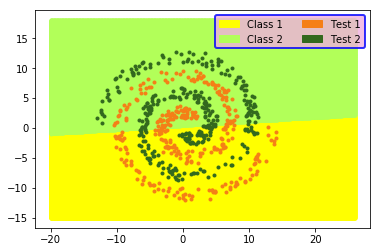

In [6]:
task1234(cov_task1(),cov_task1())

## Calling part(b)

Confusion Matrix : [[173, 153], [131, 195]]
Accuracy : 0.564417177914
Precision :[0.569078947368421, 0.5603448275862069] Mean Precision : 0.564711887477
Recall :[0.5306748466257669, 0.598159509202454] Mean Recall : 0.564417177914
F-measure :[0.5492063492063493, 0.5786350148367952] Mean F-measure : 0.563920682022


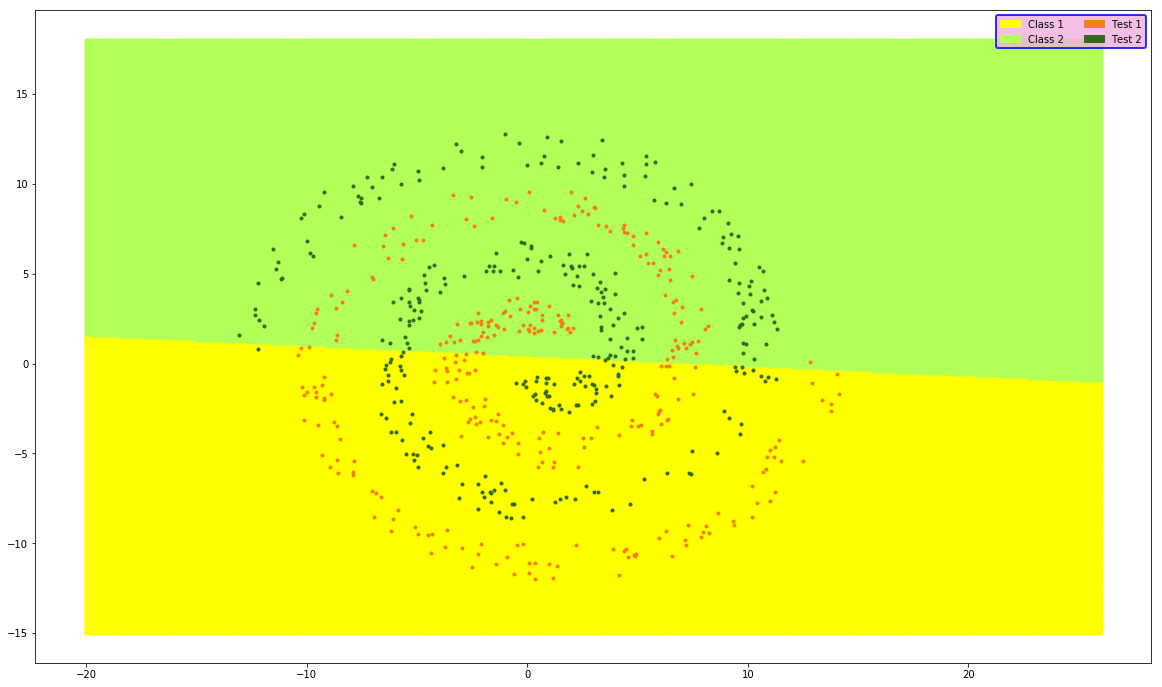

In [7]:
task1234(cov_task2(),cov_task2())

## Calling part(c)

Confusion Matrix : [[174, 152], [141, 185]]
Accuracy : 0.550613496933
Precision :[0.5523809523809524, 0.5489614243323442] Mean Precision : 0.550671188357
Recall :[0.5337423312883436, 0.5674846625766872] Mean Recall : 0.550613496933
F-measure :[0.5429017160686428, 0.5580693815987934] Mean F-measure : 0.550485548834


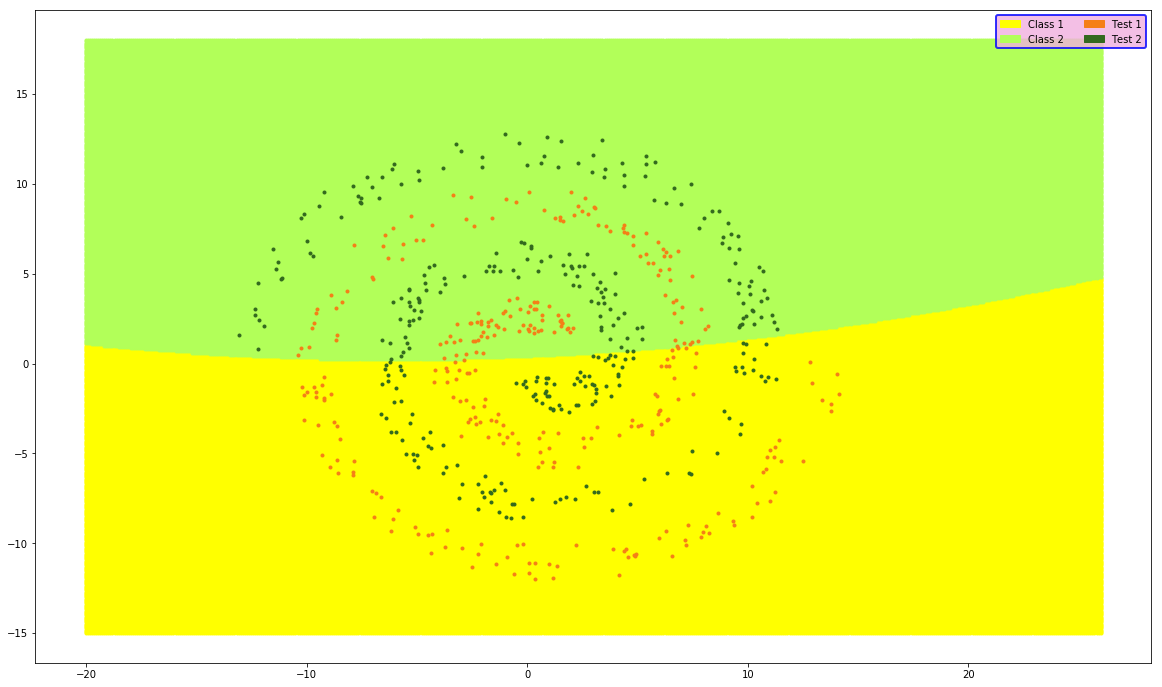

In [8]:
cov_a,cov_b=cov_task3()
task1234(cov_a,cov_b)

## Calling part(d)

Confusion Matrix : [[176, 150], [135, 191]]
Accuracy : 0.562883435583
Precision :[0.5659163987138264, 0.5601173020527859] Mean Precision : 0.563016850383
Recall :[0.5398773006134969, 0.5858895705521472] Mean Recall : 0.562883435583
F-measure :[0.5525902668759811, 0.5727136431784108] Mean F-measure : 0.562651955027


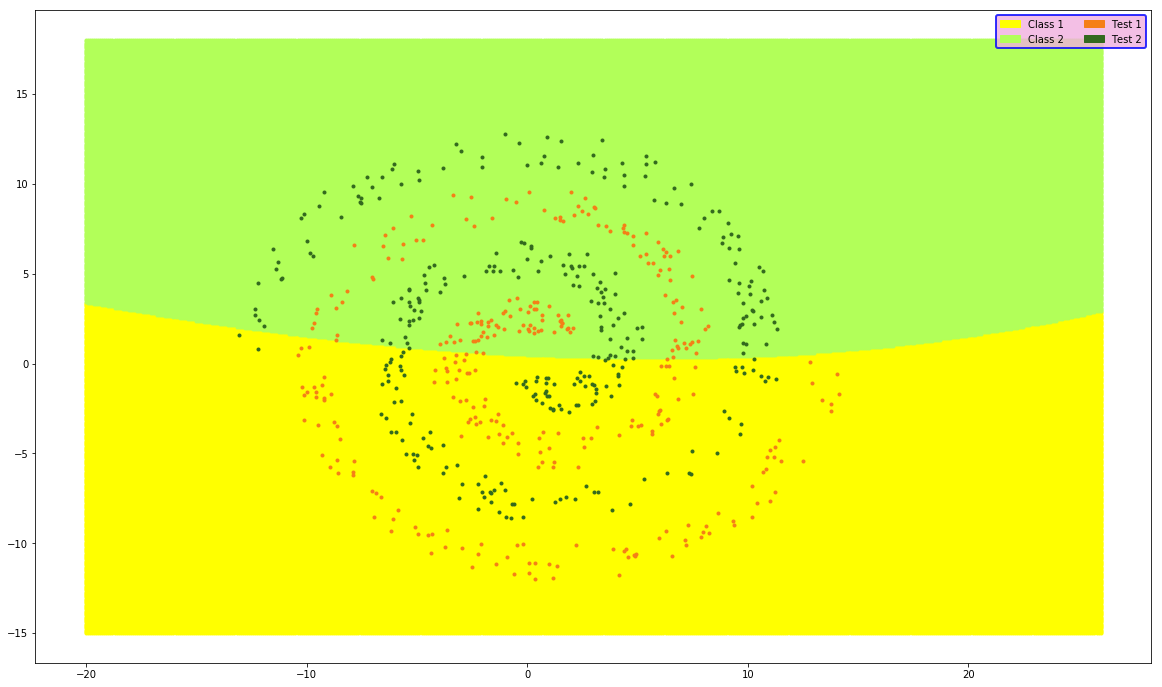

In [9]:
task1234(cov1,cov2)

# Finished. Codes below this cell are redundant. Thanks.